In [2]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

# Reading data for 3 resolutions

Muninn format

In [3]:
datatime=[]
datagrid=[]
datam=[]
databeta=[]
dataxi=[]
dataderxi=[]
vars=["m", "beta", "xi", "derxi"]
res=[1,2,3]
for resolution in res:


    time=[]
    grid=[]
    m=[]
    beta=[]
    xi=[]
    derxi=[]
    k=1

    for var in vars:
        dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res{}/{}.txt".format(resolution,var)
        
    
        print(dir)

        with open(dir) as f:
            for line in f:

                index = line.find("Time")
                if index==1:
                    if k==1:
                        time.append(float(line[index+7:len(line)-1]))
                    auxgrid=[]
                    auxdata=[]
                

                else:
                    a=line.split()
                    if a!=[]:
                        if k==1:
                            auxgrid.append(float(a[0]))
                        auxdata.append(float(a[1]))
                    elif a==[]:
                        grid.append(auxgrid)
                        if k==1:
                            m.append(auxdata)
                        elif k==2:
                            beta.append(auxdata)
                        elif k==3:
                            xi.append(auxdata)
                        elif k==4:
                            derxi.append(auxdata)
                    
        k=k+1


    datatime.append(time)
    datagrid.append(grid)
    datam.append(m)
    databeta.append(beta)
    dataxi.append(xi)
    dataderxi.append(derxi)
#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res1/m.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res1/beta.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res1/xi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res1/derxi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res2/m.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res2/beta.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res2/xi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res2/derxi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res3/m.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res3/beta.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/mmbom/res3/xi.txt
/home/rita13santos/Desktop/MSc The

In [6]:
datatime[0][10]

0.2

In [7]:
len(datagrid[0][0])

107

In [8]:
print(len(datam[0]))
print(len(databeta[0]))
print(len(dataxi[0]))
print(len(dataderxi[0]))

76
76
76
76


####

In [9]:
print(datam[0][0][1]) # datam indexes give res, time then gridpoint

0.0


In [265]:
L=len(datam[0][0])-6 # grid length without the ghostpoints
dx=datagrid[0][0][1]-datagrid[0][0][0]

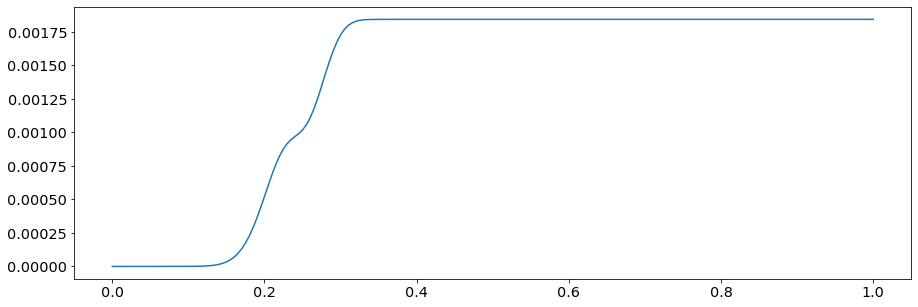

In [217]:
#plt_x1 = np.linspace(0, 1, L)
#plt_x2 = np.linspace(0, 1, 2*L-1)
#plt_x3 = np.linspace(0, 1, 4*L-3)
t=0
plt_x1 = datagrid[0][t][3:len(datagrid[0][0])-3]
plt_x2 = datagrid[1][t*2][3:len(datagrid[1][0])-3]
plt_x3 = datagrid[2][t*3][3:len(datagrid[2][0])-3]

plt.plot(plt_x1,datam[0][0][3:len(datam[0][0])-3])
#plt.plot(plt_x2,datam[1][0][3:len(datam[1][0])-3])
#plt.plot(plt_x3,datam[2][0][3:len(datam[2][0])-3])

# Styling plots

In [218]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Plotting data with resolutions 1 and 2 and differences 

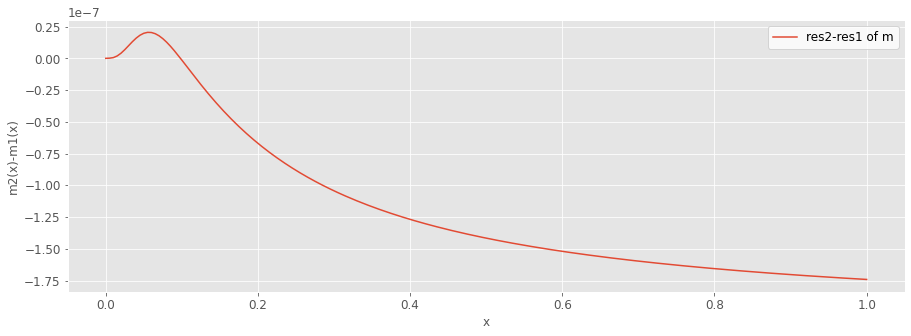

In [219]:
# for given t
t1=100 #last timestep
t2=2*t1
t3=4*t1
auxm = []
auxbeta = []
auxxi = []
auxderxi = []
auxgrid = []

for i in range(len(datam[1][t2])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datam[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
        auxm.append(datam[1][t2][i])
        auxbeta.append(databeta[1][t2][i])
        auxxi.append(dataxi[1][t2][i])
        auxderxi.append(dataderxi[1][t2][i])
        auxgrid.append(datagrid[1][t2][i])
        #print(datam[1][0][i])

        
# array for all diff_m_2_1 diff_beta_2_1 diff_xi_2_1 diff_derxi_2_1
diffs_2_1 = []

#subtracting f in both resolutions & ignoring ghost points
diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],auxm))
diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],auxbeta))
diffs_2_1.append(np.subtract(dataxi[0][t1][3:len(dataxi[0][t1])-3],auxxi))
diffs_2_1.append(np.subtract(dataderxi[0][t1][3:len(dataderxi[0][t1])-3],auxderxi))
diffs_2_1.append(np.subtract(datagrid[0][t1][3:len(datagrid[0][t1])-3],auxgrid))

with plt.style.context('ggplot'):
    plt.plot(plt_x1, diffs_2_1[0], label = 'res2-res1 of m')

plt.legend()
plt.xlabel('x')
plt.ylabel('m2(x)-m1(x)')
plt.show()


In [220]:

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)



# Pointwise convergence tests: plots for thesis project report 

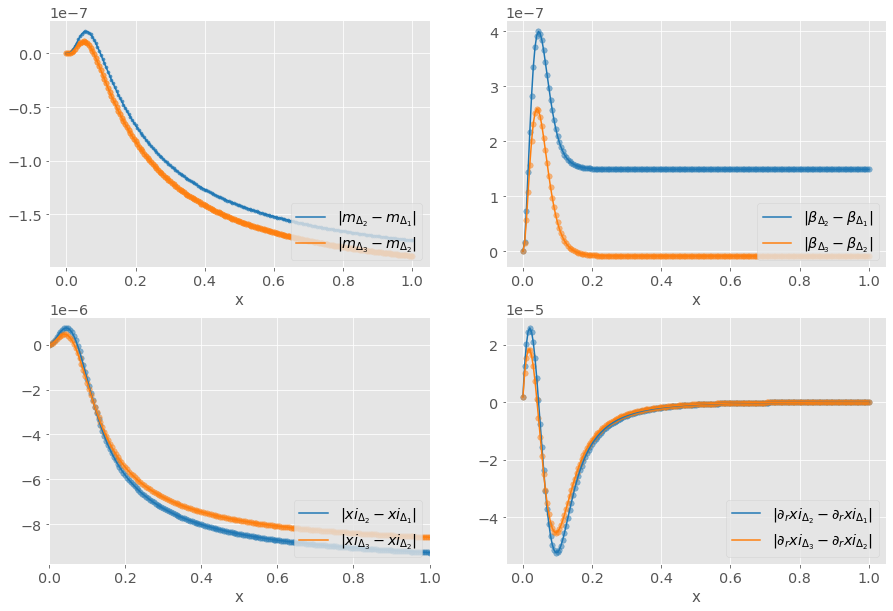

In [221]:
# for given t

aux2m = []
aux2beta = []
aux2xi = []
aux2derxi = []
aux2grid = []
for i in range(len(datam[2][t3])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datam[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
        aux2m.append(datam[2][t3][i])
        aux2beta.append(databeta[2][t3][i])
        aux2xi.append(dataxi[2][t3][i])
        aux2derxi.append(dataderxi[2][t3][i])
        aux2grid.append(datagrid[2][t3][i])
        


#subtracting m beta xi and derxi in both resolutions & ignoring ghost points
diffs_4_2 =[]
diffs_4_2.append(np.subtract(auxm,aux2m))
diffs_4_2.append(np.subtract(auxbeta,aux2beta))
diffs_4_2.append(np.subtract(auxxi,aux2xi))
diffs_4_2.append(np.subtract(auxderxi,aux2derxi))
diffs_4_2.append(np.subtract(auxgrid,aux2grid))

with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(2, 2,figsize=(15, 10))
   
    
    ax[0][0].plot(plt_x1, (diffs_2_1[0]), label='$|m_{\Delta_2}-m_{\Delta_1}|$',color='#1f77b4')
    ax[0][0].plot(plt_x1, (diffs_4_2[0])*4, label='$|m_{\Delta_3}-m_{\Delta_2}|$',color='#ff7f0e')
    ax[0][0].scatter(plt_x1, (diffs_2_1[0]),alpha=0.7,s=10,color='#1f77b4')
    ax[0][0].scatter(plt_x1, (diffs_4_2[0])*4,alpha=0.7,s=30,color='#ff7f0e')
    ax[0][0].set_xlabel('x',fontsize=15)
    ax[0][0].legend(loc='lower right')
    
    ax[0][1].plot(plt_x1, (diffs_2_1[1]), label='$|\\beta_{\Delta_2}-\\beta_{\Delta_1}|$',color='#1f77b4')
    ax[0][1].plot(plt_x1, (diffs_4_2[1])*4, label='$|\\beta_{\Delta_3}-\\beta_{\Delta_2}|$',color='#ff7f0e')
    ax[0][1].scatter(plt_x1, (diffs_2_1[1]),alpha=0.5,s=30,color='#1f77b4')
    ax[0][1].scatter(plt_x1, (diffs_4_2[1])*4,alpha=0.5,s=30,color='#ff7f0e')
    ax[0][1].set_xlabel('x',fontsize=15)
    #ax[0][1].set_xlim([0, 0.05])
    #ax[0][1].set_ylim([0, 1*10**(-11)])
    ax[0][1].legend(loc='lower right')
    
    ax[1][0].plot(plt_x1, (diffs_2_1[2]), label='$|xi_{\Delta_2}-xi_{\Delta_1}|$',color='#1f77b4')
    ax[1][0].plot(plt_x1, (diffs_4_2[2])*4, label='$|xi_{\Delta_3}-xi_{\Delta_2}|$',color='#ff7f0e')
    ax[1][0].set_xlabel('x',fontsize=15)
    ax[1][0].scatter(plt_x1, (diffs_2_1[2]),alpha=0.5,s=30,color='#1f77b4')
    ax[1][0].scatter(plt_x1, (diffs_4_2[2])*4,alpha=0.5,s=30,color='#ff7f0e')
    ax[1][0].set_xlim([0, 1])
    ax[1][0].legend(loc='lower right')
    
    ax[1][1].plot(plt_x1, (diffs_2_1[3]), label='$|\partial_r xi_{\Delta_2}-\partial_r xi_{\Delta_1}|$',color='#1f77b4')
    ax[1][1].plot(plt_x1, (diffs_4_2[3])*4, label='$|\partial_r xi_{\Delta_3}-\partial_r xi_{\Delta_2}|$',color='#ff7f0e')
    ax[1][1].scatter(plt_x1, (diffs_2_1[3]),alpha=0.5,s=30,color='#1f77b4')
    ax[1][1].scatter(plt_x1, (diffs_4_2[3])*4,alpha=0.5,s=30,color='#ff7f0e')
    ax[1][1].set_xlabel('x',fontsize=15)
    ax[1][1].legend(loc='lower right')


plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

plt.show()



# L2 norm convergence tests

In [222]:
#for the first time step

norm_low_med = []
norm_med_high = []

for j in range(5):
    a = 0
    b = 0
    for i in diffs_2_1[j]:
        a += i**2
    for i in diffs_4_2[j]:
        b += i**2
    norm_low_med.append(np.sqrt(a))
    norm_med_high.append(np.sqrt(b))

print("m convergence factor:")
print(math.log2(norm_low_med[0]/norm_med_high[0]))
print("")

print("beta convergence factor:")
print(math.log2(norm_low_med[1]/norm_med_high[1]))
print("")

print("xi convergence factor:")
print(math.log2(norm_low_med[2]/norm_med_high[2]))
print("")

print("derxi convergence factor:")
print(math.log2(norm_low_med[3]/norm_med_high[3]))
print("")


m convergence factor:
1.8603668226979815

beta convergence factor:
3.6229285550342363

xi convergence factor:
2.1059229927957985

derxi convergence factor:
2.189345304907428



In [223]:
norm_low_med[1]

2.4124800178012784e-06

In [224]:
norm_low_med[1]

2.4124800178012784e-06

# Q(t)

In [225]:
final_t=len(datatime[2])

In [226]:
"""m100=Q_m
beta100=Q_beta
xi100=Q_xi
derxi100=Q_derxi
x100=plt_x = np.linspace(0, 1.5, len(m100))
Q100=Q;"""

'm100=Q_m\nbeta100=Q_beta\nxi100=Q_xi\nderxi100=Q_derxi\nx100=plt_x = np.linspace(0, 1.5, len(m100))\nQ100=Q;'

In [227]:
rsquarednorm=True


/tmp/ipykernel_8886/2063626547.py:89: RuntimeWarning: invalid value encountered in scalar divide
  Q_derxi.append(math.log2(norm_low_med[3]/norm_med_high[3]))


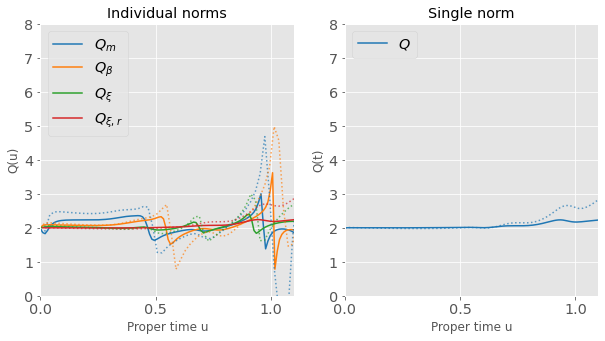

In [259]:
"""from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))"""

Q_m = []
Q_beta = []
Q_xi = []
Q_derxi = []
Q= []


for t in range(0,int(final_t/4)):
    # for given t
    t1=t #last timestep
    t2=2*t1
    t3=4*t1
    auxm = []
    auxbeta = []
    auxxi = []
    auxderxi = []

    for i in range(len(datam[1][t2])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
            auxm.append(datam[1][t2][i])
            auxbeta.append(databeta[1][t2][i])
            auxxi.append(dataxi[1][t2][i])
            auxderxi.append(dataderxi[1][t2][i])
            #print(datam[1][0][i])


    # array for all diff_m_2_1 diff_beta_2_1 diff_xi_2_1 diff_derxi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],auxm))
    diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],auxbeta))
    diffs_2_1.append(np.subtract(dataxi[0][t1][3:len(dataxi[0][t1])-3],auxxi))
    diffs_2_1.append(np.subtract(dataderxi[0][t1][3:len(dataderxi[0][t1])-3],auxderxi))

    # for given t

    aux2m = []
    aux2beta = []
    aux2xi = []
    aux2derxi = []
    for i in range(len(datam[2][t3])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
            aux2m.append(datam[2][t3][i])
            aux2beta.append(databeta[2][t3][i])
            aux2xi.append(dataxi[2][t3][i])
            aux2derxi.append(dataderxi[2][t3][i])



    #subtracting m beta xi and derxi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(auxm,aux2m))
    diffs_4_2.append(np.subtract(auxbeta,aux2beta))
    diffs_4_2.append(np.subtract(auxxi,aux2xi))
    diffs_4_2.append(np.subtract(auxderxi,aux2derxi))


    ####

    norm_low_med = []
    norm_med_high = []
    single_norm_low_med = []
    single_norm_med_high = []
    s_a=0
    s_b=0

    for j in range(4):
        a = 0
        b = 0
        for i in diffs_2_1[j]:
            a += i**2
            s_a += i**2
        for i in diffs_4_2[j]:
            b += i**2
            s_b += i**2
        norm_low_med.append(np.sqrt(a))
        norm_med_high.append(np.sqrt(b))

    single_norm_low_med=np.sqrt(s_a)
    single_norm_med_high=np.sqrt(s_b)
    
    Q_m.append(math.log2(norm_low_med[0]/norm_med_high[0]))
    Q_beta.append(math.log2(norm_low_med[1]/norm_med_high[1]))
    Q_xi.append(math.log2(norm_low_med[2]/norm_med_high[2]))
    Q_derxi.append(math.log2(norm_low_med[3]/norm_med_high[3]))
    Q.append(math.log2(single_norm_low_med/single_norm_med_high))
    ####
    
plt_x = np.linspace(0, 1.5, len(Q_m))
#plt_x = np.linspace(0, int(final_t/4)*dx*step, int(final_t/4))
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(1, 2,figsize=(10, 5))
    
    ax[0].plot(plt_x, Q_m, label = '$Q_m$',color='#1f77b4')
    ax[0].plot(plt_x, Q_beta, label = '$Q_{\\beta}$',color='#ff7f0e')
    ax[0].plot(plt_x, Q_xi, label = '$Q_{\\xi}$',color='#2ca02c')
    ax[0].plot(plt_x, Q_derxi, label = '$Q_{\\xi,r}$',color='#d62728')
    
    
    ax[0].plot(x100, m100, linestyle='dotted',alpha=0.7,color='#1f77b4')
    ax[0].plot(x100, beta100, linestyle='dotted',alpha=0.7,color='#ff7f0e')
    ax[0].plot(x100, xi100, linestyle='dotted',alpha=0.7,color='#2ca02c')
    ax[0].plot(x100, derxi100, linestyle='dotted',alpha=0.7,color='#d62728')
    
    ax[0].set_ylim([0,8])
    ax[0].set_xlim([0,1.1])
    ax[0].legend(loc ="upper left")
    ax[0].set_xlabel('Proper time u')
    ax[0].set_ylabel('Q(u)')
    ax[0].set_title('Individual norms')
    ax[0].set_yticks(np.arange(0, 8+1, 1.0))
    
    ax[1].plot(plt_x, Q, label = '$Q$',color='#1f77b4')
    ax[1].plot(x100, Q100, linestyle='dotted',alpha=0.7,color='#1f77b4')
    ax[1].set_ylim([0,8])
    ax[1].set_xlim([0,1.1])
    ax[1].legend(loc ="upper left")
    ax[1].set_title('Single norm')
    #plt.xticks(rotation=45)
    ax[1].set_xlabel('Proper time u')
    ax[1].set_ylabel('Q(t)')
    ax[1].set_yticks(np.arange(0, 8+1, 1.0))

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [241]:
110/0.75

146.66666666666666

# **** nice evol plot

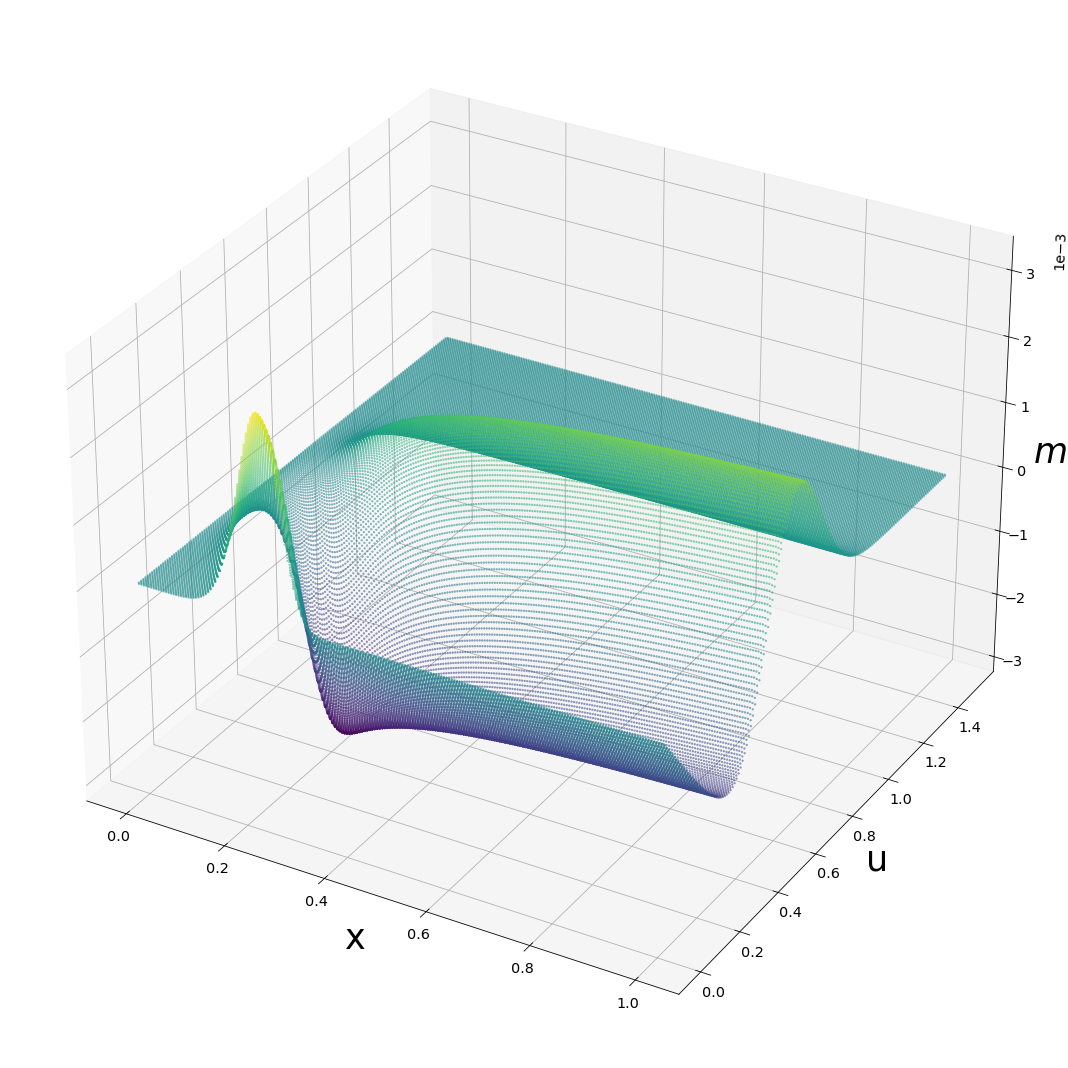

In [18]:
import matplotlib.pyplot as plt
import numpy as np

#create x,y,z for scatter
z=[]
k=0
for i in range(0,len(derxi)):
    for j in range(0,len(derxi[i])):
        k=k+1
        if np.mod(k,2)==0:
            z.append(xi[i][j])
        
x=[]
y=[]
k=0
for i in range(0,len(derxi)):
    for j in range(0,len(xi[i])):
        k=k+1
        if np.mod(k,2)==0:
            x.append(grid[i][j])
            y.append(time[i])
        
        
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')


plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
with plt.style.context('ggplot'):
    ax.set_xlabel('x', fontsize = 35.0)
    ax.set_ylabel('u', fontsize = 35.0)
    #ax.set_zlabel('$\\xi$', fontsize = 35.0)
    ax.set_zlabel('$m$', fontsize = 35.0)
    
    ax.scatter(x, y, z,s=3,c=z,cmap='viridis',alpha=0.5)
plt.ticklabel_format(style='sci', axis='z', scilimits=(0,0))


ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 8
plt.tight_layout()
plt.savefig("subcritical.pdf", format="pdf", bbox_inches="tight",dpi=30)
plt.show()


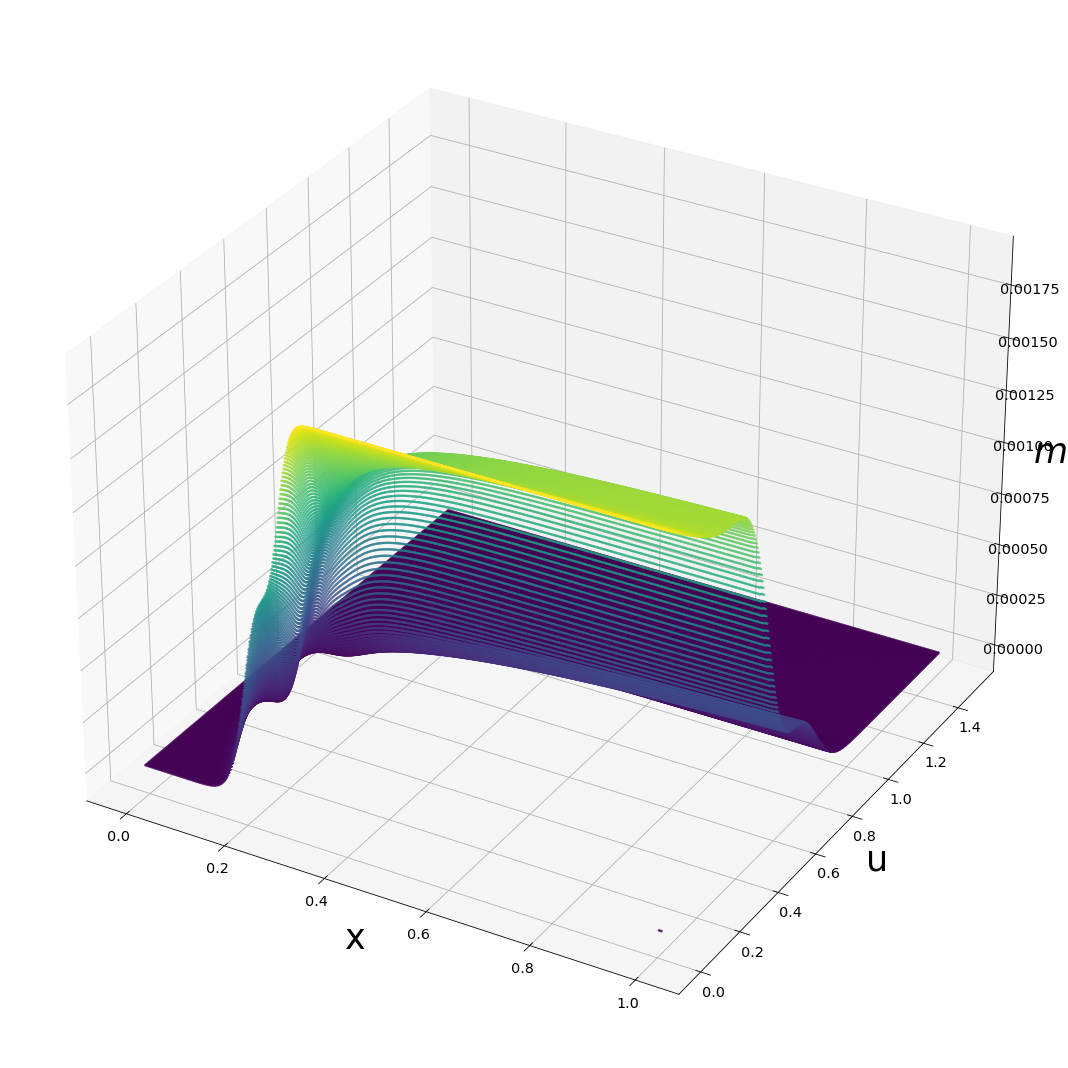

In [278]:
import matplotlib.pyplot as plt
import numpy as np

#create x,y,z for scatter
z=[]
for i in range(0,len(derxi)):
    for j in range(0,len(derxi[i])):
        z.append(m[i][j])
        
x=[]
y=[]
for i in range(0,len(derxi)):
    for j in range(0,len(derxi[i])):
        x.append(grid[i][j])
        y.append(time[i])
        
        
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')



# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
with plt.style.context('ggplot'):
    ax.set_xlabel('x', fontsize = 35.0)
    ax.set_ylabel('u', fontsize = 35.0)
    ax.set_zlabel('$m$', fontsize = 35.0)
    
    ax.scatter(x, y, z,s=4,c=z,cmap='viridis',alpha=0.7)

ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 8
plt.tight_layout()

plt.savefig("supercritical.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [84]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

def func(x, a, b, c):

    return a * np.exp(-b * x) + c

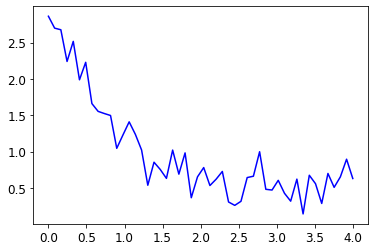

In [86]:
xdata = np.linspace(0, 4, 50)

y = func(xdata, 2.5, 1.3, 0.5)

rng = np.random.default_rng()

y_noise = 0.2 * rng.normal(size=xdata.size)

ydata = y + y_noise

plt.plot(xdata, ydata, 'b-', label='data')


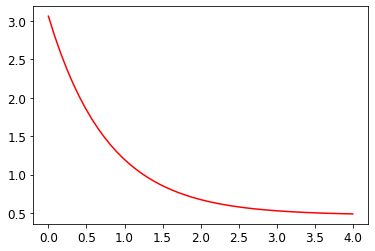

In [89]:
popt, pcov = curve_fit(func, xdata, ydata)

popt

plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))